APPROACH::
* Load all lib and datas
* Data preparation and data transformation
* View images
* Model
     - Neural network(mlp,dense,fcn)
      -Sklearn
      -tensor flow


In [ ]:
!unzip '/content/digit-recognizer (1).zip'

Archive:  /content/digit-recognizer (1).zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Image loading example

Change the filename within the imread function with your own image

In [ ]:
#import cv2

In [ ]:
#img = cv2.imread('/content/ARS-OM_1314_Ramsey_free_kick_(cropped).jpg')

In [ ]:
#type(img)

In [ ]:
#img.shape

In [ ]:
#img

# Load Images and Libraries

Load all libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load the data


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.shape

(42000, 785)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.skew()

label         0.026479
pixel0        0.000000
pixel1        0.000000
pixel2        0.000000
pixel3        0.000000
               ...    
pixel779    145.149671
pixel780      0.000000
pixel781      0.000000
pixel782      0.000000
pixel783      0.000000
Length: 785, dtype: float64

Plot the image

In [ ]:
#image_data.shape

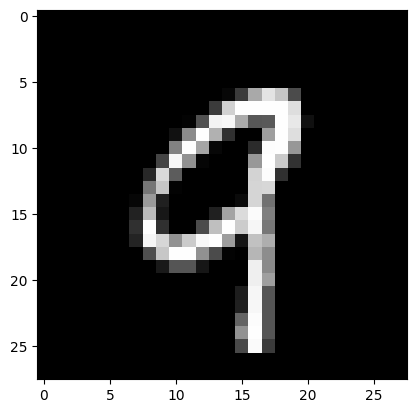

In [ ]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0,784)]
rows_to_examine = 41999
image_data = np.reshape(train[features][rows_to_examine:rows_to_examine+1].to_numpy(), (28,28))
plt.imshow(image_data, cmap = 'gray')

# Model Process

Divide the data into X & Y

In [ ]:
x = train.iloc[:,1:]
y = train['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


Single Layer Perceptron

In [ ]:
slp = Perceptron(verbose = 1)
slp.fit(x_train, y_train)
preds_slp_train = slp.predict(x_train)
preds_slp_test = slp.predict(x_test)

-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

In [ ]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Model Accuracy is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_train, preds_slp_train)

Model Accuracy is:  0.89
[[3197    0   14    5    2   31   70    1   25    2]
 [   1 3556   20    9    2    5    4    4  130    4]
 [  18    9 2961   70    9   24   34   16  193    5]
 [  19   10   83 3022    1  142   27   16  152   21]
 [   5    8  123   17 2912   19   38   17  103   34]
 [  27    3   16   78   19 2525   96    7  194   30]
 [  13    5   28    3    5   45 3122    0   46    0]
 [   7    6  134   17    7    7    6 3269   40   48]
 [  18   20   38   53    8   92   17   10 2978   12]
 [  19   15  120   63  188  119    8  298  309 2222]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3347
           1       0.98      0.95      0.97      3735
           2       0.84      0.89      0.86      3339
           3       0.91      0.87      0.88      3493
           4       0.92      0.89      0.91      3276
           5       0.84      0.84      0.84      2995
           6       0.91      0.96      0.93      3267
           

In [ ]:
model_eval(y_test, preds_slp_test)

Model Accuracy is:  0.87
[[741   1   4   0   0  10  22   0   7   0]
 [  0 895   8   6   1   3   2   0  34   0]
 [  4   3 710  28   2   9  18   4  59   1]
 [  6   2  23 742   2  38   4   5  28   8]
 [  5   6  33   2 689   2  12   6  28  13]
 [ 12   5   4  38   3 654  21   1  58   4]
 [  3   1  12   0   0  18 823   1  12   0]
 [  4   5  32   1   2   6   0 781  15  14]
 [  6  11  15   8   2  25  10   5 732   3]
 [  5   2  37  14  62  30   0  85  82 510]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       785
           1       0.96      0.94      0.95       949
           2       0.81      0.85      0.83       838
           3       0.88      0.86      0.87       858
           4       0.90      0.87      0.88       796
           5       0.82      0.82      0.82       800
           6       0.90      0.95      0.92       870
           7       0.88      0.91      0.89       860
           8       0.69      0.90      0.78       817
   

Multi Layer Perceptron

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (128,128,128), verbose = 1, max_iter = 250)

In [ ]:
mlp.fit(x_train, y_train)
preds_mlp_train = mlp.predict(x_train)
preds_mlp_test = mlp.predict(x_test)

Iteration 1, loss = 2.26802303
Iteration 2, loss = 0.44589599
Iteration 3, loss = 0.24860829
Iteration 4, loss = 0.16638868
Iteration 5, loss = 0.11792115
Iteration 6, loss = 0.08863058
Iteration 7, loss = 0.06647433
Iteration 8, loss = 0.05587760
Iteration 9, loss = 0.04449170
Iteration 10, loss = 0.04395358
Iteration 11, loss = 0.07573449
Iteration 12, loss = 0.09371198
Iteration 13, loss = 0.06697578
Iteration 14, loss = 0.05496651
Iteration 15, loss = 0.05069408
Iteration 16, loss = 0.05344063
Iteration 17, loss = 0.07429166
Iteration 18, loss = 0.07570996
Iteration 19, loss = 0.04906055
Iteration 20, loss = 0.03999927
Iteration 21, loss = 0.04174673
Iteration 22, loss = 0.05188337
Iteration 23, loss = 0.05684120
Iteration 24, loss = 0.03968476
Iteration 25, loss = 0.05446370
Iteration 26, loss = 0.05171851
Iteration 27, loss = 0.06138323
Iteration 28, loss = 0.05548371
Iteration 29, loss = 0.02683409
Iteration 30, loss = 0.03034171
Iteration 31, loss = 0.03795806
Iteration 32, los

In [ ]:
model_eval(y_train, preds_mlp_train)

Model Accuracy is:  1.0
[[3302    1    6    0    1    3   21    0   13    0]
 [   0 3734    0    0    0    0    0    1    0    0]
 [   0    1 3326    6    0    1    0    2    3    0]
 [   0    1    3 3475    0   11    0    0    2    1]
 [   0    0    3    1 3262    0    4    0    2    4]
 [   0    0    0    0    0 2992    2    1    0    0]
 [   1    0    1    0    0    2 3263    0    0    0]
 [   0    1    4    1    0    0    0 3534    0    1]
 [   0    0    5   11    0    3    0    0 3224    3]
 [   0    0    1    3    3    3    0    1    1 3349]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3347
           1       1.00      1.00      1.00      3735
           2       0.99      1.00      0.99      3339
           3       0.99      0.99      0.99      3493
           4       1.00      1.00      1.00      3276
           5       0.99      1.00      1.00      2995
           6       0.99      1.00      1.00      3267
           7

In [ ]:
model_eval(preds_mlp_test, y_test)

Model Accuracy is:  0.97
[[759   0   1   0   0   1   2   0   1   2]
 [  0 939   3   0   5   0   1   2   3   0]
 [  5   3 810   4   2   1   0  11   3   0]
 [  0   3  12 831   0  11   0   5   7   6]
 [  0   0   1   0 763   1   1   4   1  11]
 [  1   0   0  13   0 776   6   1   8  10]
 [ 11   1   3   0   7   2 859   0   6   0]
 [  2   0   4   4   3   0   1 830   1  11]
 [  5   3   3   5   3   6   0   1 784   3]
 [  2   0   1   1  13   2   0   6   3 784]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       766
           1       0.99      0.99      0.99       953
           2       0.97      0.97      0.97       839
           3       0.97      0.95      0.96       875
           4       0.96      0.98      0.97       782
           5       0.97      0.95      0.96       815
           6       0.99      0.97      0.98       889
           7       0.97      0.97      0.97       856
           8       0.96      0.96      0.96       813
   

# Implementation using TensorFlow

Load the TensorFlow Libraries

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

Declare the model: Sequential or Functional

In [ ]:
model = Sequential()

Declare the Layers: Dense

In [ ]:
model.add(Dense(256, activation = 'relu', input_dim = 784))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics =['accuracy'])

Fit the model

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
print(y_train.shape)
print(y_train_ohe.shape)

(33600,)
(33600, 10)


In [ ]:
y_train_ohe

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_train

40572    2
20883    9
3479     2
34084    1
2067     5
        ..
7763     0
15377    7
17730    9
28030    6
15725    7
Name: label, Length: 33600, dtype: int64

In [ ]:
hist = model.fit(x_train, y_train_ohe,validation_data = (x_test, y_test_ohe), epochs = 200, batch_size = 64, verbose = 2)

Epoch 1/200
525/525 - 5s - loss: 1.6774 - accuracy: 0.8692 - val_loss: 0.4600 - val_accuracy: 0.9190 - 5s/epoch - 10ms/step
Epoch 2/200
525/525 - 5s - loss: 0.3312 - accuracy: 0.9313 - val_loss: 0.2982 - val_accuracy: 0.9369 - 5s/epoch - 9ms/step
Epoch 3/200
525/525 - 4s - loss: 0.1871 - accuracy: 0.9545 - val_loss: 0.2940 - val_accuracy: 0.9355 - 4s/epoch - 7ms/step
Epoch 4/200
525/525 - 4s - loss: 0.1531 - accuracy: 0.9601 - val_loss: 0.2400 - val_accuracy: 0.9532 - 4s/epoch - 8ms/step
Epoch 5/200
525/525 - 5s - loss: 0.1299 - accuracy: 0.9649 - val_loss: 0.2122 - val_accuracy: 0.9543 - 5s/epoch - 10ms/step
Epoch 6/200
525/525 - 4s - loss: 0.1069 - accuracy: 0.9724 - val_loss: 0.2634 - val_accuracy: 0.9468 - 4s/epoch - 8ms/step
Epoch 7/200
525/525 - 4s - loss: 0.1166 - accuracy: 0.9693 - val_loss: 0.1936 - val_accuracy: 0.9581 - 4s/epoch - 8ms/step
Epoch 8/200
525/525 - 5s - loss: 0.0952 - accuracy: 0.9742 - val_loss: 0.2013 - val_accuracy: 0.9555 - 5s/epoch - 9ms/step
Epoch 9/200
52

<function matplotlib.pyplot.show(close=None, block=None)>

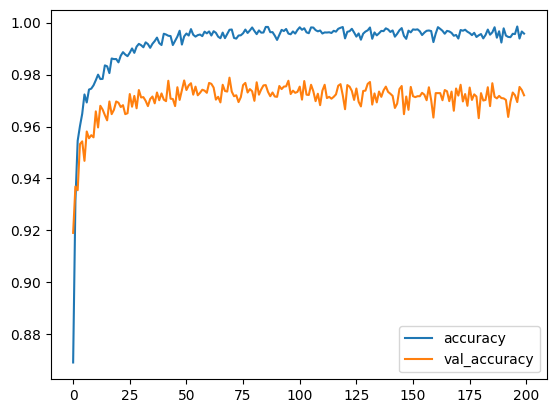

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show

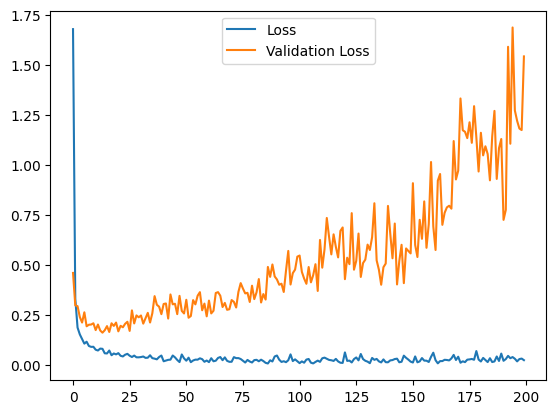

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

Using dropout

In [ ]:
model.add(Dense(512, activation = 'relu', input_dim = 784))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics =['accuracy'])

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
hist = model.fit(x_train, y_train_ohe,validation_data = (x_test, y_test_ohe), epochs = 200, batch_size = 64, verbose = 2)

Epoch 1/200
525/525 - 12s - loss: 0.0567 - accuracy: 0.9951 - val_loss: 0.2047 - val_accuracy: 0.9761 - 12s/epoch - 23ms/step
Epoch 2/200
525/525 - 11s - loss: 0.3912 - accuracy: 0.8683 - val_loss: 1.4279 - val_accuracy: 0.4043 - 11s/epoch - 21ms/step
Epoch 3/200
525/525 - 9s - loss: 1.5912 - accuracy: 0.3788 - val_loss: 1.6138 - val_accuracy: 0.3410 - 9s/epoch - 17ms/step
Epoch 4/200
525/525 - 10s - loss: 1.5812 - accuracy: 0.3633 - val_loss: 1.6047 - val_accuracy: 0.3546 - 10s/epoch - 19ms/step
Epoch 5/200
525/525 - 11s - loss: 1.5824 - accuracy: 0.3568 - val_loss: 1.5761 - val_accuracy: 0.3680 - 11s/epoch - 21ms/step
Epoch 6/200
525/525 - 10s - loss: 1.5944 - accuracy: 0.3603 - val_loss: 1.5749 - val_accuracy: 0.3731 - 10s/epoch - 19ms/step
Epoch 7/200
525/525 - 9s - loss: 1.6330 - accuracy: 0.3436 - val_loss: 1.6624 - val_accuracy: 0.3206 - 9s/epoch - 17ms/step
Epoch 8/200
525/525 - 10s - loss: 1.6553 - accuracy: 0.3186 - val_loss: 1.6401 - val_accuracy: 0.3293 - 10s/epoch - 19ms/s